In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# CI

In [2]:
def confidence_interval(sample, distribution='t', confidence_level=0.95, std_general=None):
    """
    Функція для розрахунку довірчого інтервалу для середнього значення вибірки 
    з використанням t-розподілу чи нормального розподілу.

    Параметри:
    sample (array-like): Вибірка для аналізу.

    distribution (str, optional): Тип розподілу для використання у розрахунках. 
    Може бути 't' для t-розподілу Стьюдента чи 'z' для нормального розподілу. За замовчуванням 't'.

    confidence_level (float, optional): Рівень довіри для інтервалу. За замовчуванням 0.95.

    std_general (float, optional): Відоме стандартне відхилення генеральної сукупності.

    Повертає:
    tuple: Довірчий інтервал у формі (нижня межа, верхня межа).

    Використання розподілів:
    - 't' (t-розподіл Стьюдента) рекомендується використовувати, 
    коли розмір вибірки є малим (зазвичай менше 30) чи коли стандартне відхилення генеральної сукупності невідоме.

    - 'z' (нормальний розподіл) рекомендується використовувати для великих вибірок (30 чи більше), 
    де застосовна центральна гранична теорема, що дозволяє припустити, що розподіл середніх значень вибірки є нормальним.
    """
    mean = np.mean(sample)
    std_dev = np.std(sample, ddof=1) if std_general is None else std_general
    n = len(sample)
    alpha = 1 - confidence_level

    if distribution == 't':
        degrees_of_freedom = n - 1
        critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
    elif distribution == 'z':
        critical_value = stats.norm.ppf(1 - alpha / 2)
    else:
        raise ValueError("Невідомий тип розподілу. Використовуйте 't' або 'z'.")

    margin_of_error = critical_value * (std_dev / np.sqrt(n))
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)

    return confidence_interval

Припустимо, ви аналізуєте дані про тривалість сну у вибірці з 50 людей. Ваша вибірка має середню тривалість сну 7.5 годин і стандартне відхилення 1.2 години.

In [3]:
np.random.seed(42)
sample = np.random.normal(loc=7.5, scale=1.2, size=50)

In [4]:
confidence_interval = confidence_interval(sample, distribution='t', confidence_level=0.95, std_general=1.2)
print(f"Довірчий інтервал для середньої: {confidence_interval}")

Довірчий інтервал для середньої: (6.888395087545784, 7.57046753983948)


Отже, 95% довірчий інтервал для тривалості сну буде від 6.88 до 7.57 годин. Це означає, що з ймовірністю 95% справжня середня тривалість сну у популяції буде в межах цього інтервалу.

# PDF & CDF

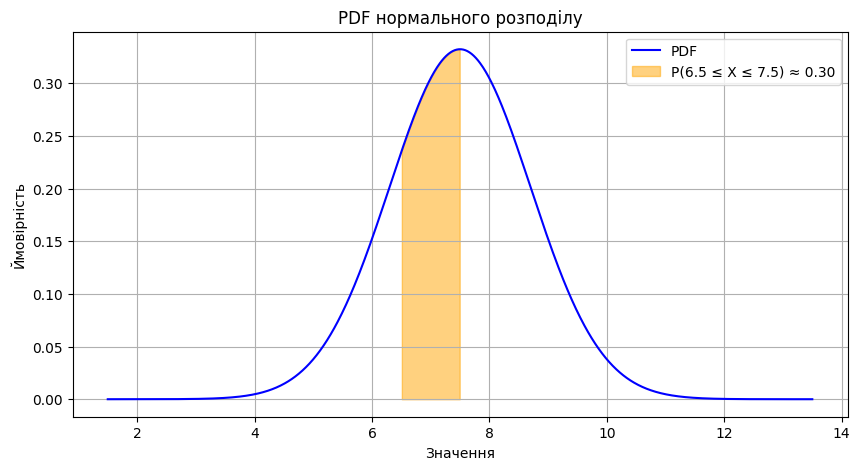

0.29812017379959843

In [5]:
def normal_distribution_analysis(mu, sigma, a=None, b=None, num_points=1000, plot=False):
    """
    Універсальна функція для аналізу нормального розподілу.
    
    Параметри:
    - mu, sigma: середнє та стандартне відхилення
    - a, b: межі проміжку для ймовірності (опціонально)
    - num_points: кількість точок для побудови PDF/CDF
    - plot: чи будувати графік PDF (True/False)
    
    Повертає:
    - pdf: значення PDF на сітці
    - cdf: значення CDF на сітці
    - x: сітка значень
    - prob: ймовірність потрапити в [a,b] (None, якщо a або b не вказані)
    """
    # Сітка значень
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, num_points)
    dx = x[1] - x[0]
    
    # PDF
    pdf = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
    
    # CDF чисельно
    cdf = np.cumsum(pdf) * dx
    
    # Ймовірність потрапити в [a,b]
    prob = None
    if a is not None and b is not None:
        i_a = np.searchsorted(x, a)
        i_b = np.searchsorted(x, b)
        prob = cdf[i_b] - cdf[i_a]
    
    # Побудова графіка PDF
    if plot:
        plt.figure(figsize=(10,5))
        plt.plot(x, pdf, label='PDF', color='blue')
        if prob is not None:
            plt.fill_between(x[i_a:i_b], pdf[i_a:i_b], color='orange', alpha=0.5,
                             label=f'P({a} ≤ X ≤ {b}) ≈ {prob:.2f}')
        plt.xlabel('Значення')
        plt.ylabel('Ймовірність')
        plt.title('PDF нормального розподілу')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return pdf, cdf, x, prob

pdf, cdf, x, prob = normal_distribution_analysis(mu=7.5, sigma=1.2, a=6.5, b=7.5, plot=True)
prob

Отже, існує 30% ймовірність що тривалість сну конкретної людини буде в межах між 6.5 та 7.5 годинами